### Importing Libraries and Data

In [1]:
# Import all required libraries
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Uploading all datasets

In [3]:
uploaded = files.upload()

Saving Greenhouse_Gas_Emissions_20240507.csv to Greenhouse_Gas_Emissions_20240507.csv


In [4]:
uploaded2 = files.upload()

Saving Montgomery County Weather Data.csv to Montgomery County Weather Data.csv


In [5]:
uploaded3 = files.upload()

Saving UN Emissions Data.csv to UN Emissions Data.csv


In [6]:
uploaded4 = files.upload()

Saving era5-x0.25_timeseries_tas_timeseries_annual_1950-2022_mean_historical_era5_x0.25_mean.csv to era5-x0.25_timeseries_tas_timeseries_annual_1950-2022_mean_historical_era5_x0.25_mean.csv


In [7]:
uploaded5 = files.upload()

Saving UNdata_Export_20240507_224802562.csv to UNdata_Export_20240507_224802562.csv


In [8]:
# Creating pandas dataframes for all datasets

In [9]:
for filename in uploaded:
    MC_Emissions = pd.read_csv(filename)

In [10]:
for filename in uploaded2:
    MC_Weather = pd.read_csv(filename)

In [11]:
for filename in uploaded3:
  UN_Emissions = pd.read_csv(filename)

In [12]:
for filename in uploaded4:
    UN_Temperature = pd.read_csv(filename)

In [13]:
for filename in uploaded5:
    UN_Precipitation = pd.read_csv(filename)

In [14]:
# Starting strucutre of all datasets

In [15]:
print(MC_Emissions.head())

  Month/Year  Facilities  Fleet  Total
0   Aug 2020        4617   3946   8563
1   Oct 2020        4337   4140   8477
2   Nov 2020        4681   4017   8686
3   Dec 2020        6195   4319  10514
4   Jan 2021        6011   4192  10203


In [16]:
print(MC_Weather.head())

            Month  Avg. Temp.  Min. Temp.  Max. Temp.  Precipitation  \
0   January, 1990        40.6        31.6        49.6           3.74   
1  February, 1990        41.8        30.9        52.7           1.94   
2     March, 1990        47.2        36.3        58.0           2.82   
3     April, 1990        53.8        42.8        64.8           4.26   
4       May, 1990        60.8        51.0        70.5           5.62   

  Heating Degree Days  Cooling Degree Days  
0                 NaN                  NaN  
1                 NaN                  NaN  
2                 NaN                  NaN  
3                 NaN                  NaN  
4                 NaN                  NaN  


In [17]:
print(UN_Emissions.head())

    Country  Year  Annual Net Emissions/Removals
0  Bulgaria  1990                   82655.300000
1    Canada  1990                  524785.584100
2    Cyprus  1990                    5423.869654
3   Czechia  1990                  192141.743700
4   Denmark  1990                   79872.010000


In [18]:
print(UN_Temperature.head())

         code     name  1950-07  1951-07  1952-07  1953-07  1954-07  1955-07  \
0  ALA.841242   Aaland     6.36     6.34     5.37     6.50     5.78     5.40   
1         ALB  Albania    12.92    12.53    12.81    11.78    11.37    12.06   
2    ALB.3305    Berat    14.81    14.45    14.92    13.75    13.39    14.08   
3    ALB.3306  Bulqize     9.82     9.39     9.48     8.47     8.21     8.75   
4    ALB.3307  Delvine    15.41    14.96    15.36    14.26    13.93    14.59   

   1956-07  1957-07  ...  2013-07  2014-07  2015-07  2016-07  2017-07  \
0     4.74     5.65  ...     7.09     7.69     8.07     7.14     7.14   
1    11.26    12.11  ...    13.04    13.00    13.10    13.00    12.97   
2    13.20    14.07  ...    14.74    14.55    14.74    14.72    14.74   
3     8.24     8.92  ...    10.08    10.22    10.11    10.10     9.99   
4    13.70    14.54  ...    15.14    14.97    15.23    15.14    14.96   

   2018-07  2019-07  2020-07  2021-07  2022-07  
0     7.61     7.65     8.83   

In [19]:
print(UN_Precipitation.head())

  Country or Area  Year     Value  Value Footnotes                  Unit
0        Bulgaria  2017   84411.0              NaN  million cubic metres
1        Bulgaria  2016   74713.0              NaN  million cubic metres
2        Bulgaria  2015   82073.0              NaN  million cubic metres
3        Bulgaria  2014  115306.0              NaN  million cubic metres
4        Bulgaria  2013   70865.0              NaN  million cubic metres


### Cleaning and Wrangling Data

In [20]:
# Altering the structure of the UN_Temperature Data to seprate each area's data into 1 row per year instead of having 1 row including a column for every year of data.

In [21]:
UN_Temperature_melted = UN_Temperature.melt(id_vars=["code", "name"], var_name="year_month", value_name="mean_temperature")
UN_Temperature_melted['year'] = UN_Temperature_melted['year_month'].str.split('-').str[0].astype(int)
UN_Temperature_melted.drop(columns=['year_month'], inplace=True)
print(UN_Temperature_melted.head())

         code     name  mean_temperature  year
0  ALA.841242   Aaland              6.36  1950
1         ALB  Albania             12.92  1950
2    ALB.3305    Berat             14.81  1950
3    ALB.3306  Bulqize              9.82  1950
4    ALB.3307  Delvine             15.41  1950


In [22]:
# Narrowing down the areas of the UN_Temeprature dataset to only include the countries included in the other Untied Nations datasets

In [23]:
countries_of_interest = [
    "Bulgaria", "Cyprus", "Czechia", "Denmark", "Finland", "France",
    "Latvia", "Lithuania", "Monaco", "Netherlands", "Norway",
    "Poland", "Portugal", "Slovakia", "Switzerland"
]

In [24]:
filtered_UN_Temperature = UN_Temperature_melted[UN_Temperature_melted['name'].isin(countries_of_interest)]

In [25]:
# Converting temperature and emmission values to use same units across all datasets

In [26]:
filtered_UN_Temperature['mean_temperature'] = filtered_UN_Temperature['mean_temperature'] * 1.8 + 32

<ipython-input-26-c4d9f6b60484>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_UN_Temperature['mean_temperature'] = filtered_UN_Temperature['mean_temperature'] * 1.8 + 32


In [27]:
MC_Emissions['Facilities'] = MC_Emissions['Facilities'] / 1000
MC_Emissions['Fleet'] = MC_Emissions['Fleet'] / 1000
MC_Emissions['Total'] = MC_Emissions['Total'] / 1000

In [29]:
MC_Emissions['Month/Year'] = pd.to_datetime(MC_Emissions['Month/Year'], format='%b %Y')
MC_Weather['Month'] = pd.to_datetime(MC_Weather['Month'], format='%B, %Y')
UN_Precipitation['Year'] = pd.to_numeric(UN_Precipitation['Year'], errors='coerce')
filtered_UN_Temperature['year'] = pd.to_numeric(filtered_UN_Temperature['year'], errors='coerce')

<ipython-input-29-883db6eb836e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_UN_Temperature['year'] = pd.to_numeric(filtered_UN_Temperature['year'], errors='coerce')


In [30]:
start_mc_emissions = pd.Timestamp('2019-01-01')
end_mc_emissions = pd.Timestamp('2023-12-31')
start_mc_weather = pd.Timestamp('1990-01-01')
end_mc_weather = pd.Timestamp('2024-12-31')
start_year_un = 1990
end_year_un = 2021

In [37]:
MC_Emissions_filtered = MC_Emissions[(MC_Emissions['Month/Year'] >= start_mc_emissions) & (MC_Emissions['Month/Year'] <= end_mc_emissions)]
MC_Weather_filtered = MC_Weather[(MC_Weather['Month'] >= start_mc_weather) & (MC_Weather['Month'] <= end_mc_weather)]
UN_Precipitation_filtered = UN_Precipitation[(UN_Precipitation['Year'] >= start_year_un) & (UN_Precipitation['Year'] <= end_year_un)]
filtered_UN_Temperature_filtered = filtered_UN_Temperature[(filtered_UN_Temperature['year'] >= start_year_un) & (filtered_UN_Temperature['year'] <= end_year_un)]
UN_Emissions_filtered = UN_Emissions[(UN_Emissions['Year'] >= start_year_un) & (UN_Emissions['Year'] <= end_year_un)]

### Initial Visualizations

In [38]:
sns.set(style="whitegrid")

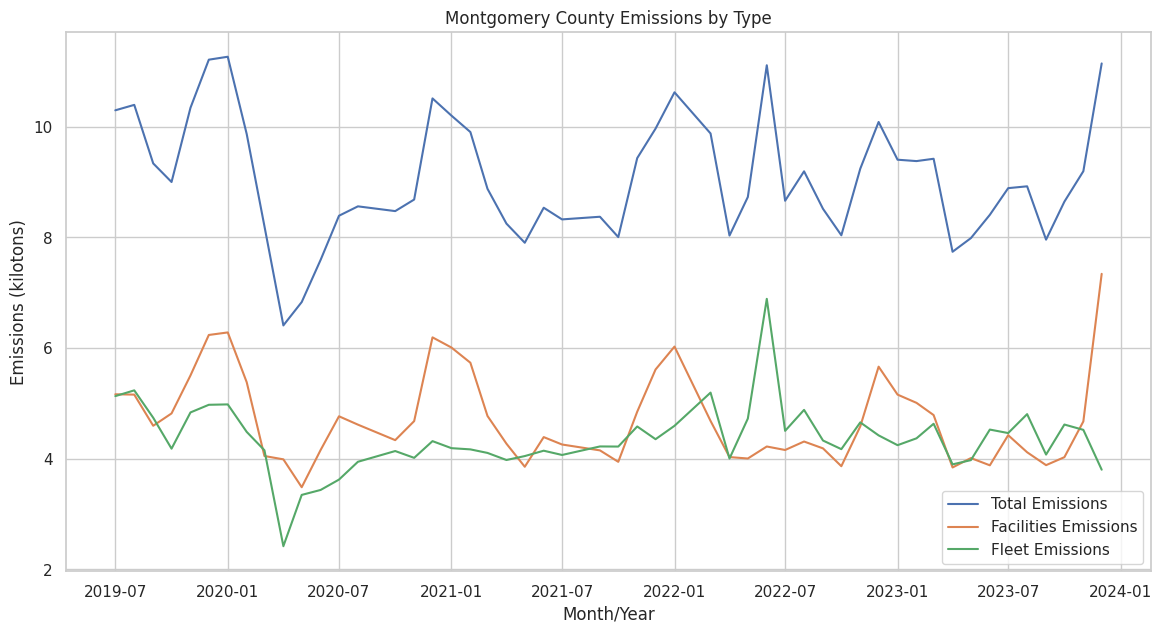

In [39]:
plt.figure(figsize=(14, 7))
plt.title("Montgomery County Emissions by Type")
sns.lineplot(data=MC_Emissions_filtered, x='Month/Year', y='Total', label='Total Emissions')
sns.lineplot(data=MC_Emissions_filtered, x='Month/Year', y='Facilities', label='Facilities Emissions')
sns.lineplot(data=MC_Emissions_filtered, x='Month/Year', y='Fleet', label='Fleet Emissions')
plt.xlabel('Month/Year')
plt.ylabel('Emissions (kilotons)')
plt.legend()
plt.show()

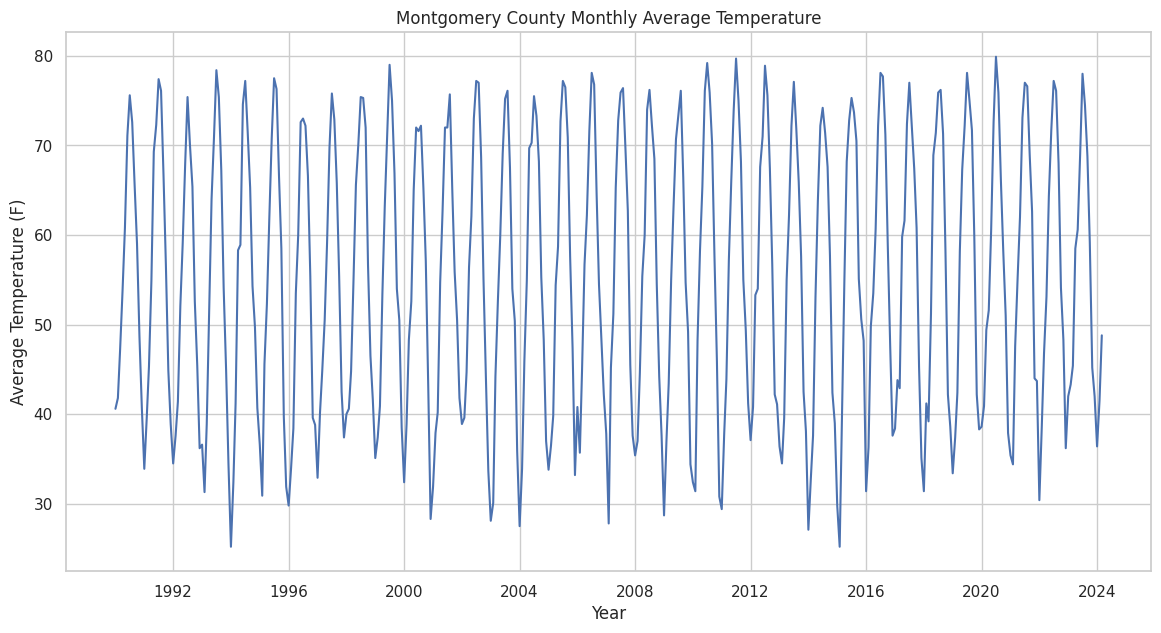

In [40]:
plt.figure(figsize=(14, 7))
plt.title("Montgomery County Monthly Average Temperature")
sns.lineplot(data=MC_Weather_filtered, x='Month', y='Avg. Temp.')
plt.xlabel('Year')
plt.ylabel('Average Temperature (F)')
plt.show()

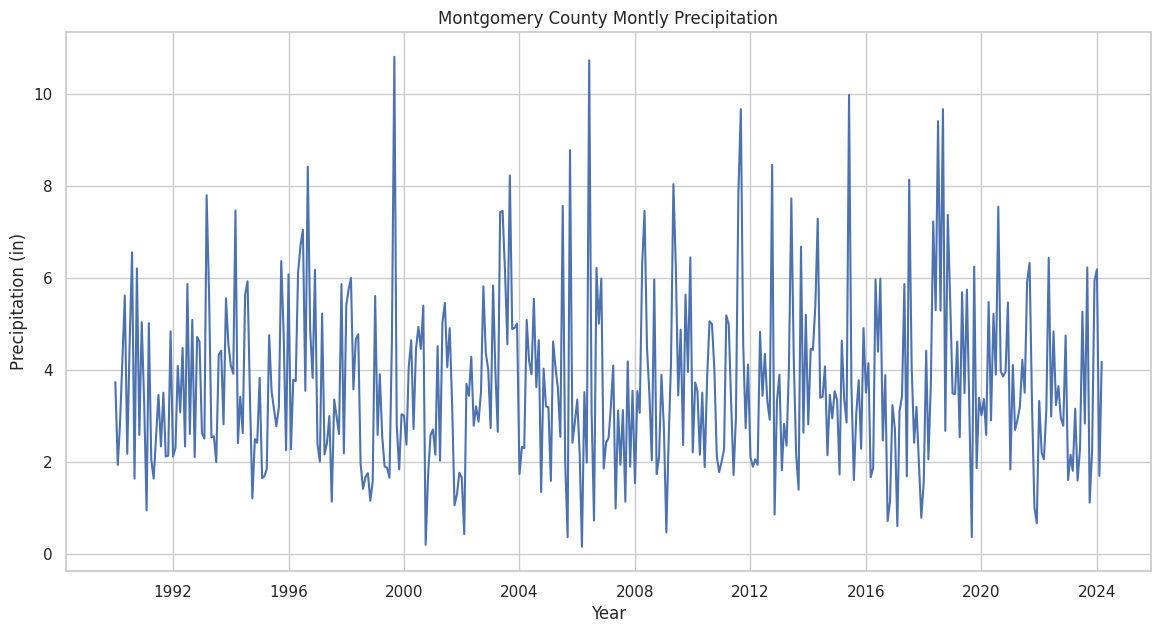

In [41]:
plt.figure(figsize=(14, 7))
plt.title("Montgomery County Montly Precipitation")
sns.lineplot(data=MC_Weather_filtered, x='Month', y='Precipitation')
plt.xlabel('Year')
plt.ylabel('Precipitation (in)')
plt.show()

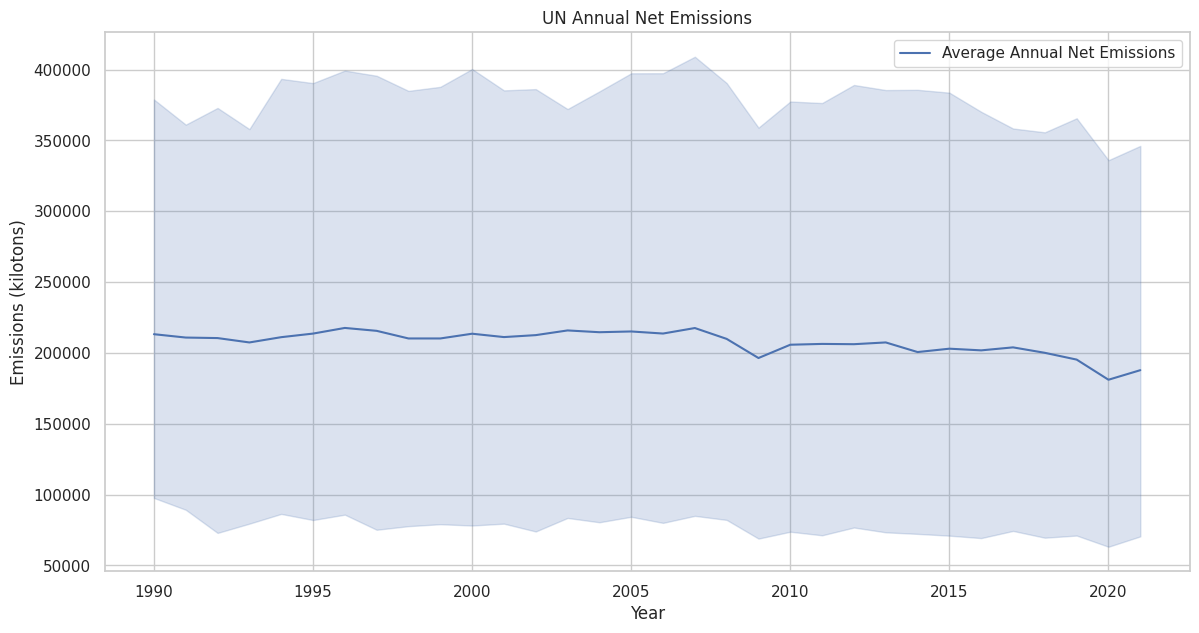

In [42]:
plt.figure(figsize=(14, 7))
plt.title("UN Annual Net Emissions")
sns.lineplot(data=UN_Emissions_filtered, x='Year', y='Annual Net Emissions/Removals', label='Average Annual Net Emissions')
plt.xlabel('Year')
plt.ylabel('Emissions (kilotons)')
plt.legend()
plt.show()

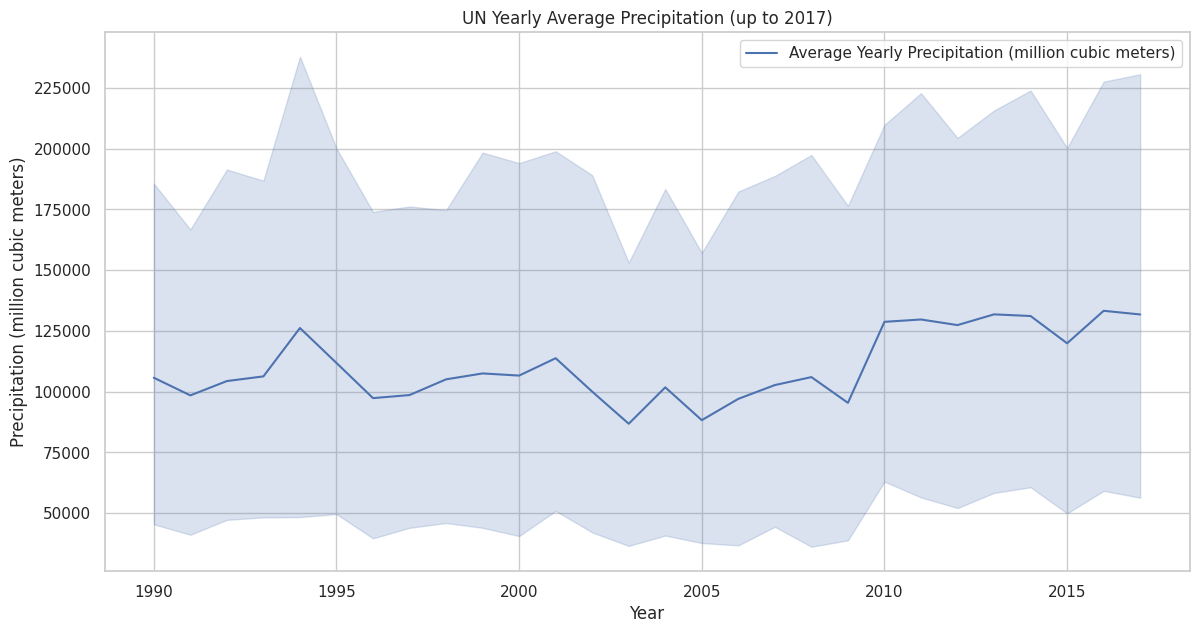

In [43]:
UN_Precipitation_filtered = UN_Precipitation_filtered[UN_Precipitation_filtered['Year'] <= 2017]
plt.figure(figsize=(14, 7))
plt.title("UN Yearly Average Precipitation (up to 2017)")
sns.lineplot(data=UN_Precipitation_filtered, x='Year', y='Value', label='Average Yearly Precipitation (million cubic meters)')
plt.xlabel('Year')
plt.ylabel('Precipitation (million cubic meters)')
plt.legend()
plt.show()

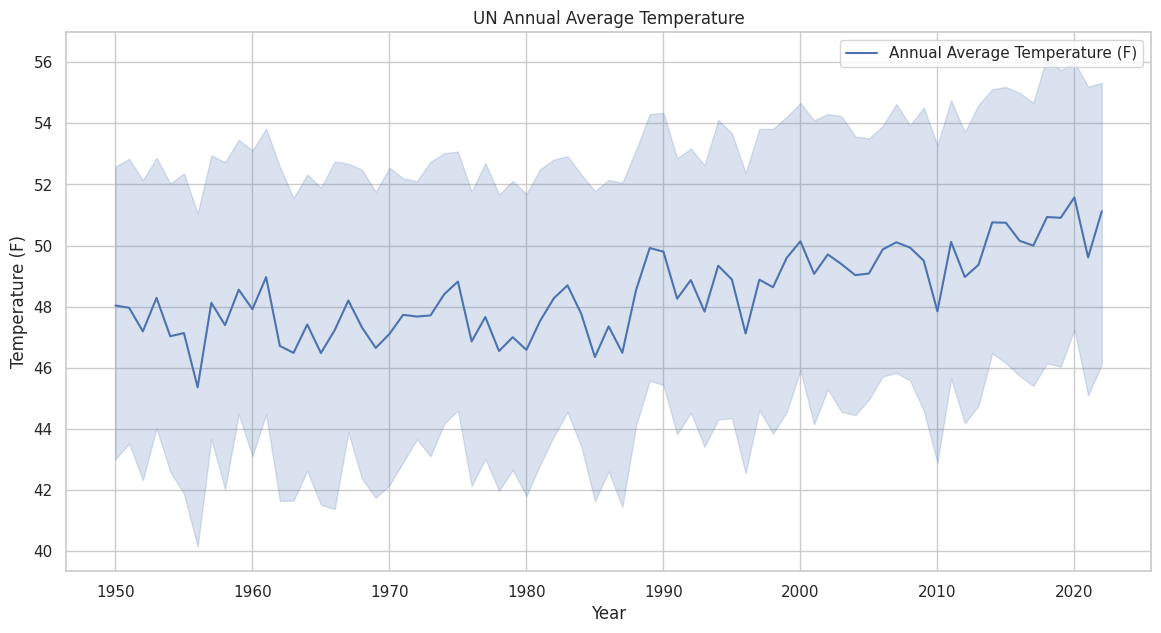

In [44]:
plt.figure(figsize=(14, 7))
plt.title("UN Annual Average Temperature")
sns.lineplot(data=filtered_UN_Temperature, x='year', y='mean_temperature', label = 'Annual Average Temperature (F)')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.legend()
plt.show()

### Data Story

In [45]:
MC_Emissions['Year'] = MC_Emissions['Month/Year'].dt.year
MC_Emissions_yearly = MC_Emissions.groupby('Year')['Total'].sum().reset_index()
num_years = MC_Emissions_yearly.shape[0]
palette = sns.color_palette("hsv", num_years)

<ipython-input-46-e8036c770a7e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=MC_Emissions_yearly, x='Year', y='Total', palette=palette)


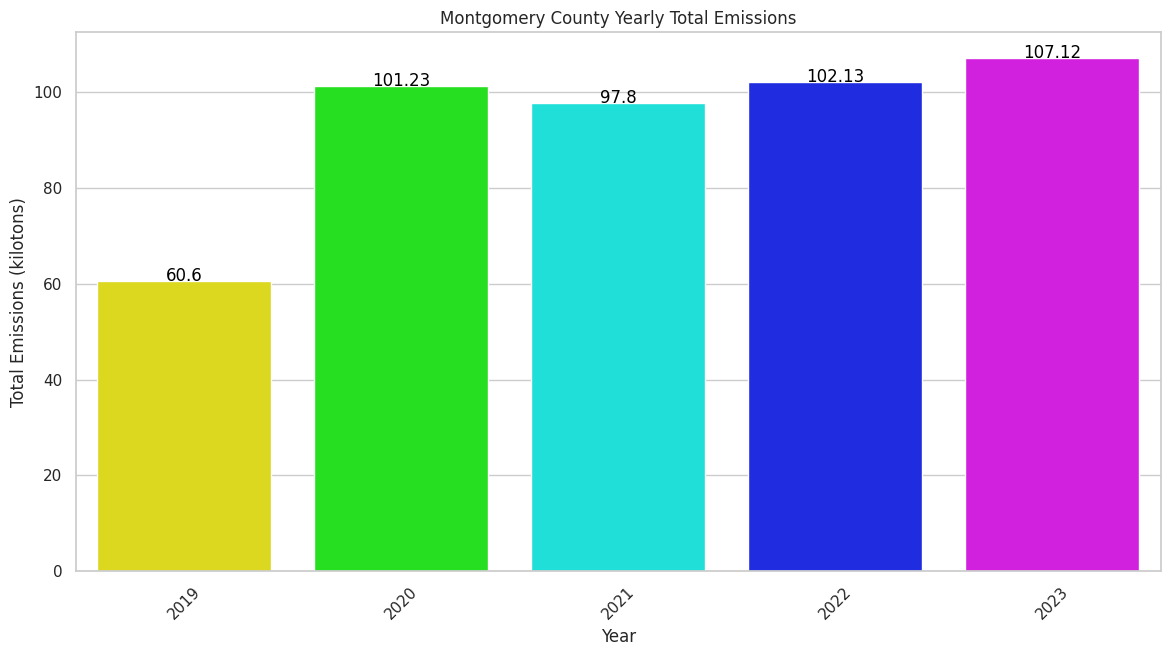

In [46]:
plt.figure(figsize=(14, 7))
plt.title("Montgomery County Yearly Total Emissions")
bar_plot = sns.barplot(data=MC_Emissions_yearly, x='Year', y='Total', palette=palette)
for index, row in MC_Emissions_yearly.iterrows():
    bar_plot.text(row.name, row['Total'], round(row['Total'], 2), color='black', ha="center")
plt.xlabel('Year')
plt.ylabel('Total Emissions (kilotons)')
plt.xticks(rotation=45)
plt.show()

In [47]:
MC_Emissions_grouped = MC_Emissions.groupby('Year')[['Facilities', 'Fleet']].sum().reset_index()
MC_Emissions_melted = MC_Emissions_grouped.melt(id_vars='Year', value_vars=['Facilities', 'Fleet'], var_name='Emission Type', value_name='Total')
palette = sns.color_palette("Set2", len(MC_Emissions_melted['Emission Type'].unique()))

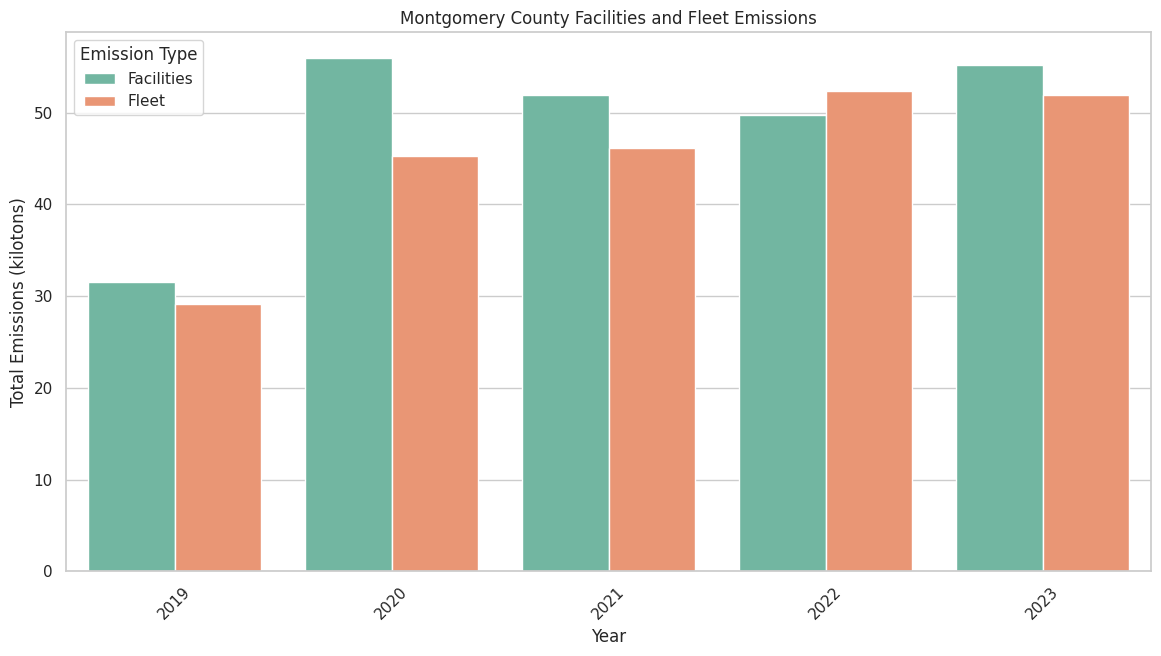

In [48]:
plt.figure(figsize=(14, 7))
plt.title("Montgomery County Facilities and Fleet Emissions")
bar_plot = sns.barplot(data=MC_Emissions_melted, x='Year', y='Total', hue='Emission Type', palette=palette)
plt.xlabel('Year')
plt.ylabel('Total Emissions (kilotons)')
plt.xticks(rotation=45)
plt.legend(title='Emission Type')
plt.show()

In [49]:
UN_Emissions_filtered = UN_Emissions[~UN_Emissions['Country'].isin(['Japan', 'Canada'])]
UN_Emissions_filtered['Annual Net Emissions/Removals'] = UN_Emissions_filtered['Annual Net Emissions/Removals'] / 1000

<ipython-input-49-4181a062aae1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UN_Emissions_filtered['Annual Net Emissions/Removals'] = UN_Emissions_filtered['Annual Net Emissions/Removals'] / 1000


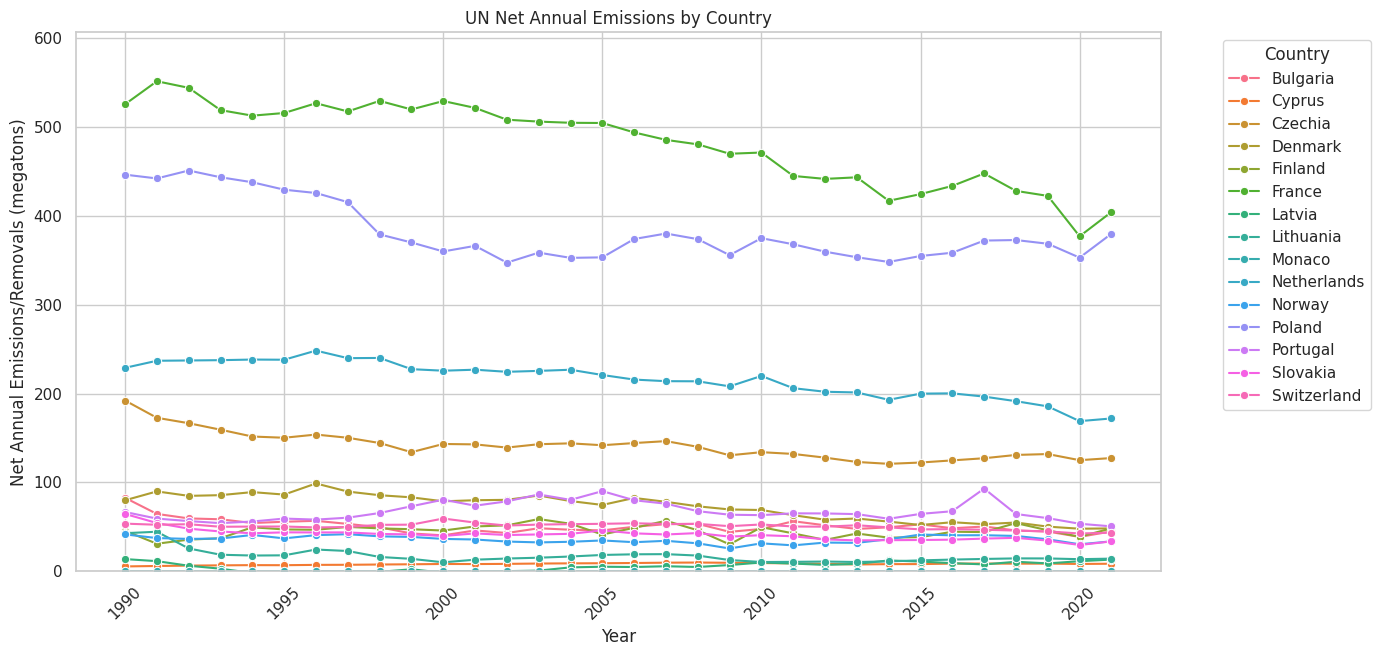

In [50]:
plt.figure(figsize=(14, 7))
plt.title("UN Net Annual Emissions by Country")
line_plot = sns.lineplot(data=UN_Emissions_filtered, x='Year', y='Annual Net Emissions/Removals', hue='Country', marker='o')
line_plot.set(ylim=(0, UN_Emissions_filtered['Annual Net Emissions/Removals'].max() * 1.1))
plt.xlabel('Year')
plt.ylabel('Net Annual Emissions/Removals (megatons)')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [51]:
emission_changes = []

In [52]:
for country, group in UN_Emissions_filtered.groupby('Country'):
    group_sorted = group.sort_values(by='Year')
    first_year = group_sorted['Year'].iloc[0]
    last_year = group_sorted['Year'].iloc[-1]
    first_emission = group_sorted[group_sorted['Year'] == first_year]['Annual Net Emissions/Removals'].values[0]
    last_emission = group_sorted[group_sorted['Year'] == last_year]['Annual Net Emissions/Removals'].values[0]
    total_change = last_emission - first_emission
    years = last_year - first_year
    avg_annual_rate = total_change / years if years != 0 else 0
    emission_changes.append({
        'Country': country,
        'Total Change (megatons)': total_change,
        'Average Annual Rate of Change (megatons/year)': avg_annual_rate
    })

In [53]:
emission_changes_df = pd.DataFrame(emission_changes)
print(emission_changes_df)

        Country  Total Change (megatons)  \
0      Bulgaria               -37.814049   
1        Cyprus                 3.016035   
2       Czechia               -64.748093   
3       Denmark               -31.654660   
4       Finland                 2.895410   
5        France              -121.292337   
6        Latvia                -0.540457   
7     Lithuania               -28.620120   
8        Monaco                -0.028787   
9   Netherlands               -56.966521   
10       Norway                -7.815063   
11       Poland               -66.501702   
12     Portugal               -16.186632   
13     Slovakia               -30.881304   
14  Switzerland               -10.207693   

    Average Annual Rate of Change (megatons/year)  
0                                       -1.219808  
1                                        0.097291  
2                                       -2.088648  
3                                       -1.021118  
4                                  

Montgomery County Change in Annual Emissions from 2020-2023: 5.89 kilotons


Montgomery County Average Rate of Change in Annual Emissions 2020-2023: 1.963 kiltons/year

In [54]:
MC_Weather['Year'] = pd.to_datetime(MC_Weather['Month'], format='%B, %Y').dt.year
filtered_mc_weather = MC_Weather[MC_Weather['Year'] < 2024]
yearly_temp_stats = filtered_mc_weather.groupby('Year').agg(
    max_temp=('Max. Temp.', 'max'),
    avg_temp=('Avg. Temp.', 'mean')
).reset_index()

<ipython-input-55-f981c933ff63>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


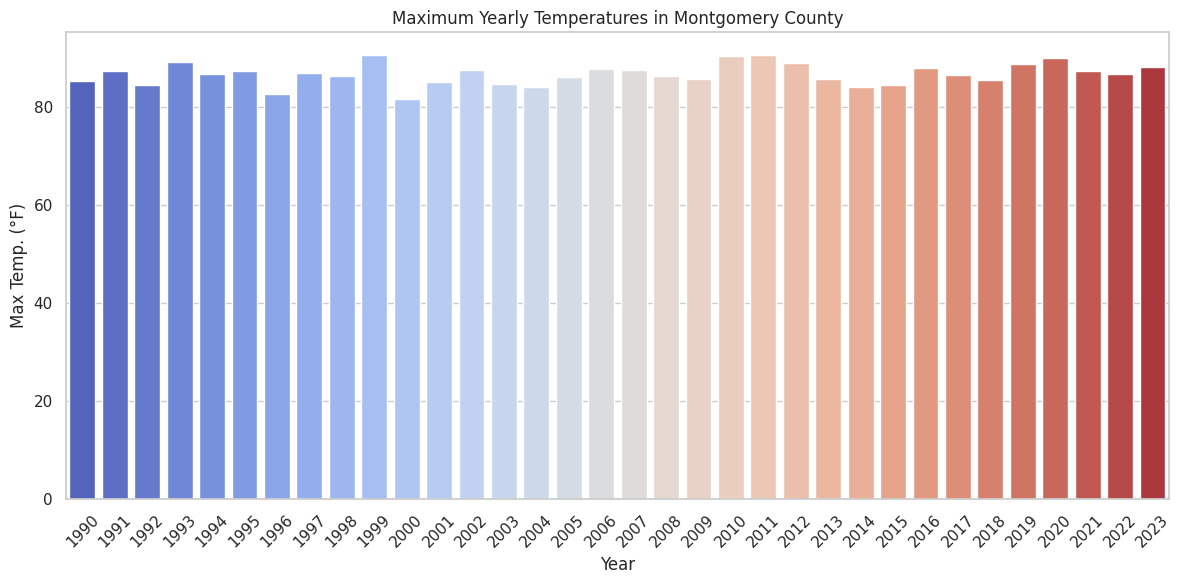

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Year', y='max_temp', data=yearly_temp_stats, palette='coolwarm'
)
plt.xlabel('Year')
plt.ylabel('Max Temp. (°F)')
plt.xticks(rotation=45)
plt.title('Maximum Yearly Temperatures in Montgomery County')
plt.tight_layout()
plt.show()

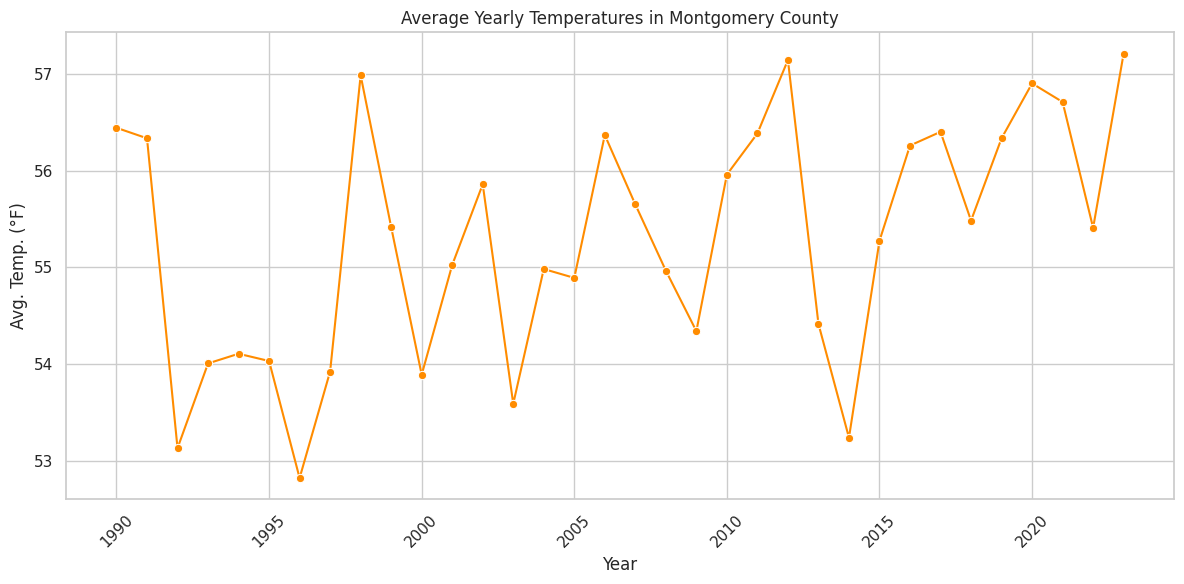

In [56]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Year', y='avg_temp', data=yearly_temp_stats, color='darkorange', marker='o'
)
plt.xlabel('Year')
plt.ylabel('Avg. Temp. (°F)')
plt.xticks(rotation=45)
plt.title('Average Yearly Temperatures in Montgomery County')
plt.tight_layout()
plt.show()

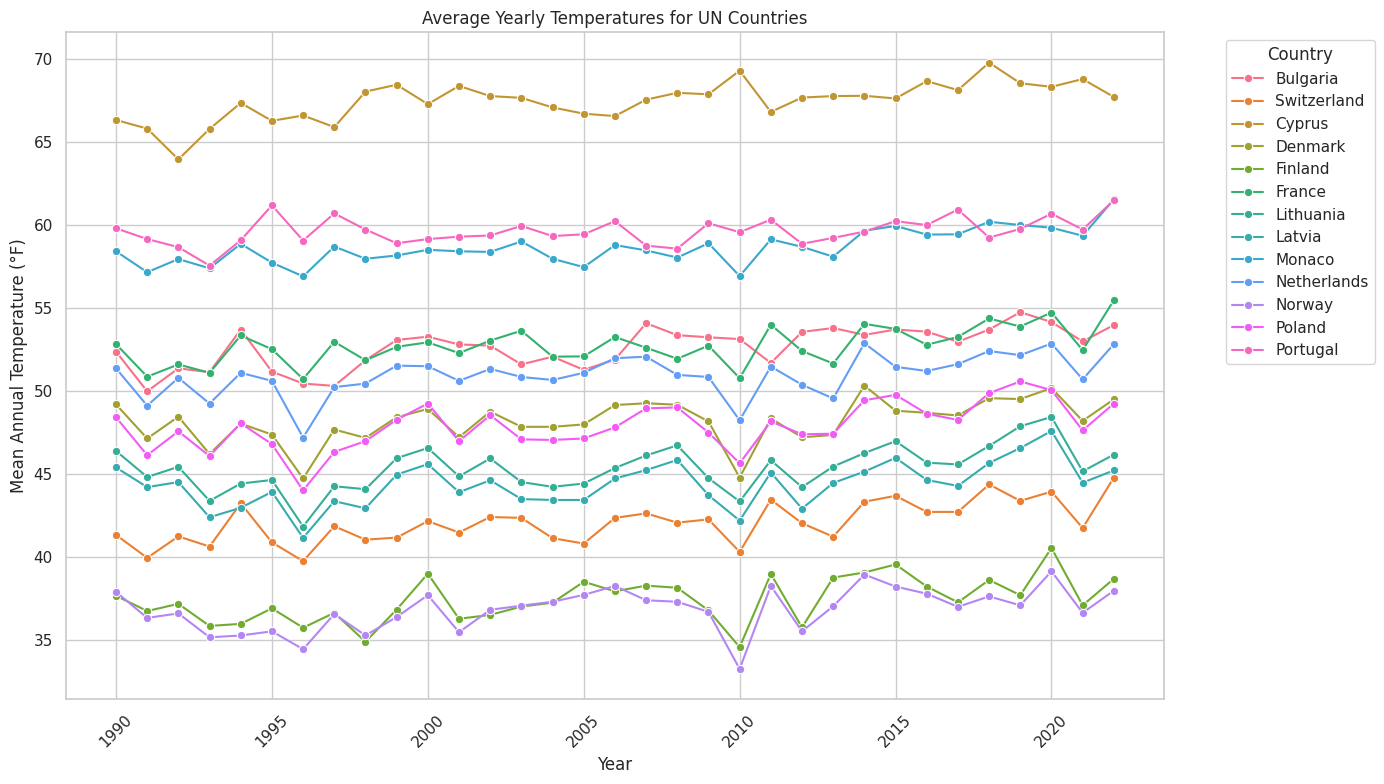

In [102]:
filtered_UN_Temperature_1990 = filtered_UN_Temperature[filtered_UN_Temperature['year'] >= 1990]
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=filtered_UN_Temperature_1990, x='year', y='mean_temperature', hue='name', marker='o'
)
plt.xlabel('Year')
plt.ylabel('Mean Annual Temperature (°F)')
plt.xticks(rotation=45)
plt.title('Average Yearly Temperatures for UN Countries')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [110]:
MC_Weather['Year'] = pd.to_datetime(MC_Weather['Month'], format='%B, %Y').dt.year
filtered_MC_Weather = MC_Weather[(MC_Weather['Year'] >= 1990) & (MC_Weather['Year'] <= 2023)]
yearly_avg_mc = filtered_MC_Weather.groupby('Year')['Avg. Temp.'].mean().reset_index()
yearly_avg_mc.sort_values('Year', inplace=True)
first_year_mc = 1990
last_year_mc = 2023
first_temp_mc = yearly_avg_mc[yearly_avg_mc['Year'] == first_year_mc]['Avg. Temp.'].values[0]
last_temp_mc = yearly_avg_mc[yearly_avg_mc['Year'] == last_year_mc]['Avg. Temp.'].values[0]
total_change_mc = last_temp_mc - first_temp_mc
years_mc = last_year_mc - first_year_mc
avg_annual_rate_mc = total_change_mc / years_mc if years_mc != 0 else 0
print(f"Montgomery County: Change in Average Temperature = {total_change_mc:.2f}°F")
print(f"Montgomery County: Average Annual Rate of Change = {avg_annual_rate_mc:.2f}°F/year")

Montgomery County: Change in Average Temperature = 0.77°F
Montgomery County: Average Annual Rate of Change = 0.02°F/year


In [82]:
country_avg_temp = filtered_UN_Temperature.groupby('name')

In [116]:
results = []

In [117]:
for name, group in filtered_UN_Temperature.groupby('name'):
    group_filtered = group[(group['year'] >= 1990) & (group['year'] <= 2023)]
    group_filtered = group_filtered.sort_values(by='year')
    if not group_filtered.empty:
        first_year = group_filtered.iloc[0]['year']
        first_temp = group_filtered.iloc[0]['mean_temperature']
        last_year = group_filtered.iloc[-1]['year']
        last_temp = group_filtered.iloc[-1]['mean_temperature']
        total_change = last_temp - first_temp
        years = last_year - first_year
        avg_annual_rate = total_change / years if years > 0 else 0
        results.append({
            'Country': name,
            'Temperature Change (°F)': total_change,
            'Average Annual Rate of Change (°F/year)': avg_annual_rate
        })

In [118]:
results_df = pd.DataFrame(results)

In [119]:
print("\nUN Countries: Change and Average Annual Rate of Change in Average Yearly Temperature")
print(results_df)


UN Countries: Change and Average Annual Rate of Change in Average Yearly Temperature
        Country  Temperature Change (°F)  \
0      Bulgaria                    1.602   
1        Cyprus                    1.386   
2       Denmark                    0.306   
3       Finland                    1.026   
4        France                    2.646   
5        Latvia                   -0.180   
6     Lithuania                   -0.216   
7        Monaco                    3.132   
8   Netherlands                    1.458   
9        Norway                    0.072   
10       Poland                    0.828   
11     Portugal                    1.692   
12  Switzerland                    3.456   

    Average Annual Rate of Change (°F/year)  
0                                  0.050062  
1                                  0.043313  
2                                  0.009563  
3                                  0.032062  
4                                  0.082687  
5                    

In [87]:
MC_Weather['Year'] = pd.to_datetime(MC_Weather['Month'], format='%B, %Y').dt.year
yearly_precip_mc = MC_Weather.groupby('Year')['Precipitation'].sum().reset_index()
yearly_precip_mc_filtered = yearly_precip_mc[yearly_precip_mc['Year'] != 2024]
UN_Precipitation_filtered['Year'] = pd.to_datetime(UN_Precipitation_filtered['Year'], format='%Y').dt.year

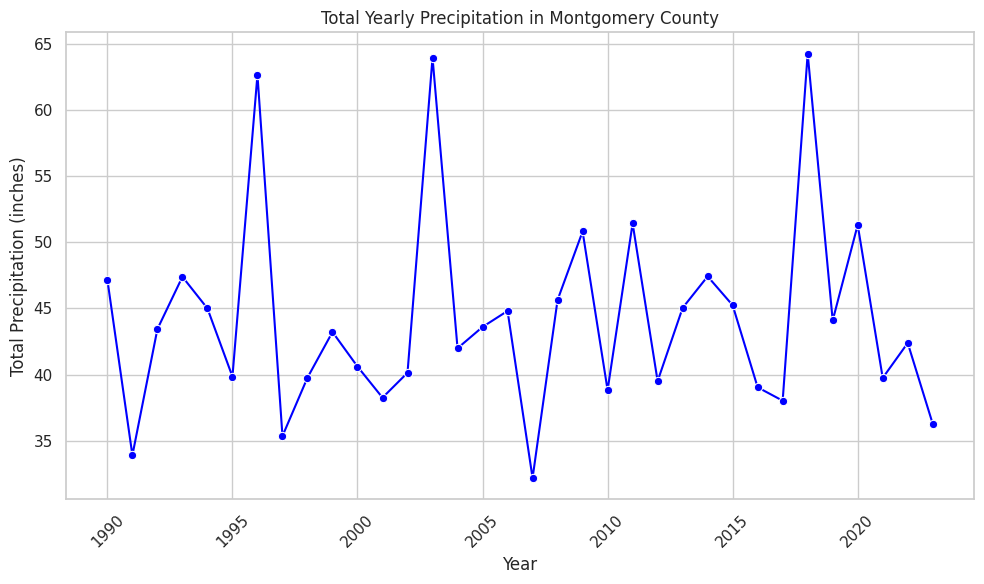

In [88]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Precipitation', data=yearly_precip_mc_filtered, marker='o', color='blue')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Precipitation (inches)')
plt.title('Total Yearly Precipitation in Montgomery County')
plt.tight_layout()
plt.show()

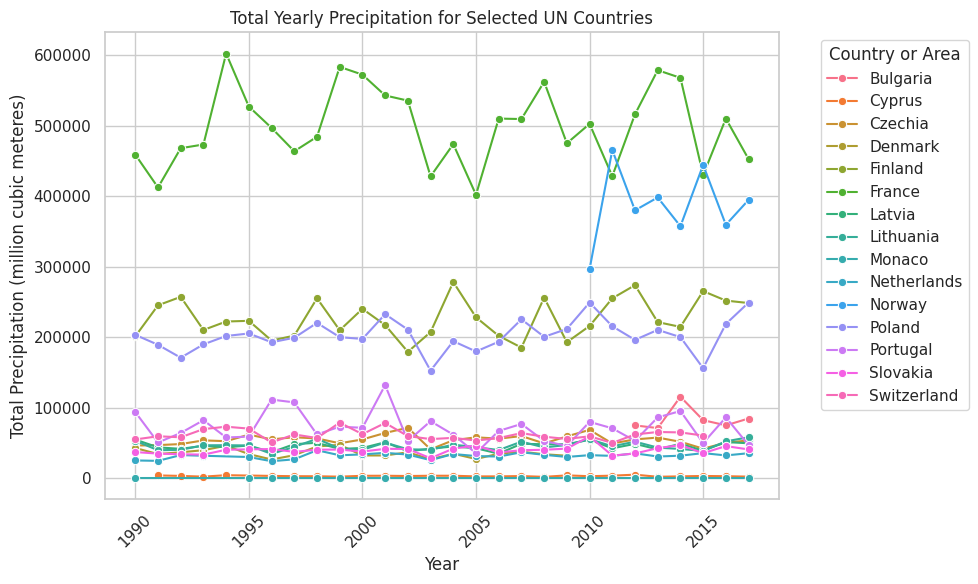

In [89]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='Year', y='Value', hue='Country or Area',
    data=UN_Precipitation_filtered, marker='o'
)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Precipitation (million cubic meteres)')
plt.title('Total Yearly Precipitation for Selected UN Countries')
plt.legend(title='Country or Area', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [90]:
mc_precip_change = {
    'Initial Year': yearly_precip_mc_filtered['Year'].min(),
    'Final Year': yearly_precip_mc_filtered['Year'].max()
}
mc_initial_precip = yearly_precip_mc_filtered[yearly_precip_mc_filtered['Year'] == mc_precip_change['Initial Year']]['Precipitation'].values[0]
mc_final_precip = yearly_precip_mc_filtered[yearly_precip_mc_filtered['Year'] == mc_precip_change['Final Year']]['Precipitation'].values[0]
mc_precip_change['Total Change (inches)'] = mc_final_precip - mc_initial_precip
years_mc = mc_precip_change['Final Year'] - mc_precip_change['Initial Year']
mc_precip_change['Average Annual Rate of Change (inches/year)'] = mc_precip_change['Total Change (inches)'] / years_mc if years_mc != 0 else 0


In [91]:
un_precip_results = []

In [92]:
for country, group in UN_Precipitation_filtered.groupby('Country or Area'):
    group_sorted = group.sort_values(by='Year')
    first_year = group_sorted['Year'].min()
    last_year = group_sorted['Year'].max()
    first_precip = group_sorted[group_sorted['Year'] == first_year]['Value'].values[0]
    last_precip = group_sorted[group_sorted['Year'] == last_year]['Value'].values[0]
    total_change = last_precip - first_precip
    years = last_year - first_year
    avg_annual_rate = total_change / years if years != 0 else 0
    un_precip_results.append({
        'Country': country,
        'Total Change (million cubic meters)': total_change,
        'Average Annual Rate of Change (million cubic meters/year)': avg_annual_rate
    })

In [93]:
print("\nMontgomery County: Change and Average Annual Rate of Change in Precipitation")
print(mc_precip_change)


Montgomery County: Change and Average Annual Rate of Change in Precipitation
{'Initial Year': 1990, 'Final Year': 2023, 'Total Change (inches)': -10.879999999999995, 'Average Annual Rate of Change (inches/year)': -0.32969696969696954}


In [94]:
un_precip_df = pd.DataFrame(un_precip_results)
print("\nUN Countries: Change and Average Annual Rate of Change in Precipitation")
print(un_precip_df)


UN Countries: Change and Average Annual Rate of Change in Precipitation
        Country  Total Change (million cubic meters)  \
0      Bulgaria                               9781.0   
1        Cyprus                              -1707.0   
2       Czechia                               7333.0   
3       Denmark                             -10992.0   
4       Finland                              47210.0   
5        France                              -6419.0   
6        Latvia                              -5276.0   
7     Lithuania                               4975.0   
8        Monaco                                 -0.1   
9   Netherlands                              10259.0   
10       Norway                              98168.0   
11       Poland                              45711.0   
12     Portugal                             -46801.0   
13     Slovakia                               3709.0   
14  Switzerland                               5494.0   

    Average Annual Rate of Cha

In [95]:
MC_Emissions['Year'] = pd.to_datetime(MC_Emissions['Month/Year'], format='%b %Y').dt.year
mc_yearly_total_emissions = MC_Emissions.groupby('Year')['Total'].sum().reset_index()
MC_Weather['Year'] = pd.to_datetime(MC_Weather['Month'], format='%B, %Y').dt.year
mc_yearly_avg_temp = MC_Weather.groupby('Year')['Avg. Temp.'].mean().reset_index()

In [96]:
mc_agg = {
    'Year': mc_yearly_total_emissions['Year'],
    'Total Emissions (kt)': mc_yearly_total_emissions['Total'],
    'Avg. Temperature (°F)': mc_yearly_avg_temp['Avg. Temp.'],
    'Total Precipitation (inches)': yearly_precip_mc_filtered.groupby('Year')['Precipitation'].sum().reset_index()['Precipitation']
}

In [97]:
mc_agg_df = pd.DataFrame(mc_agg)
mc_corr = mc_agg_df.corr()

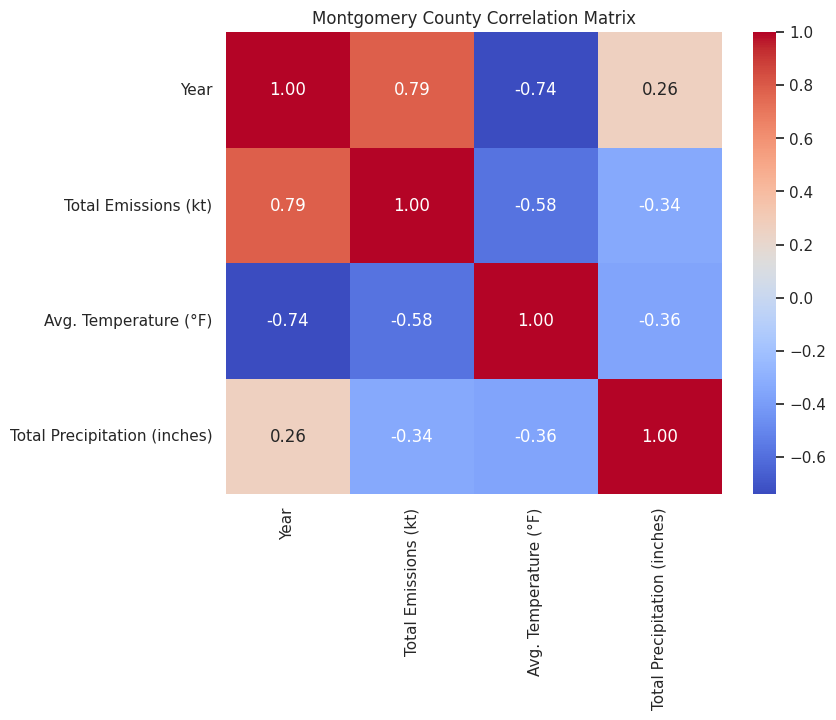

In [98]:
plt.figure(figsize=(8, 6))
sns.heatmap(mc_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Montgomery County Correlation Matrix")
plt.show()

In [99]:
un_yearly_emissions = UN_Emissions_filtered.groupby('Year')['Annual Net Emissions/Removals'].sum().reset_index()
un_yearly_emissions.rename(columns={'Annual Net Emissions/Removals': 'Total Emissions (Mt)'}, inplace=True)
un_yearly_temp = filtered_UN_Temperature.groupby('year')['mean_temperature'].mean().reset_index()
un_yearly_temp.rename(columns={'year': 'Year', 'mean_temperature': 'Average Temperature (°F)'}, inplace=True)
un_yearly_precip = UN_Precipitation_filtered.groupby('Year')['Value'].sum().reset_index()
un_yearly_precip.rename(columns={'Value': 'Total Precipitation (million cubic meters)'}, inplace=True)
un_combined = pd.merge(un_yearly_emissions, un_yearly_temp, on='Year', how='inner')
un_combined = pd.merge(un_combined, un_yearly_precip, on='Year', how='inner')
corr_matrix = un_combined.corr()

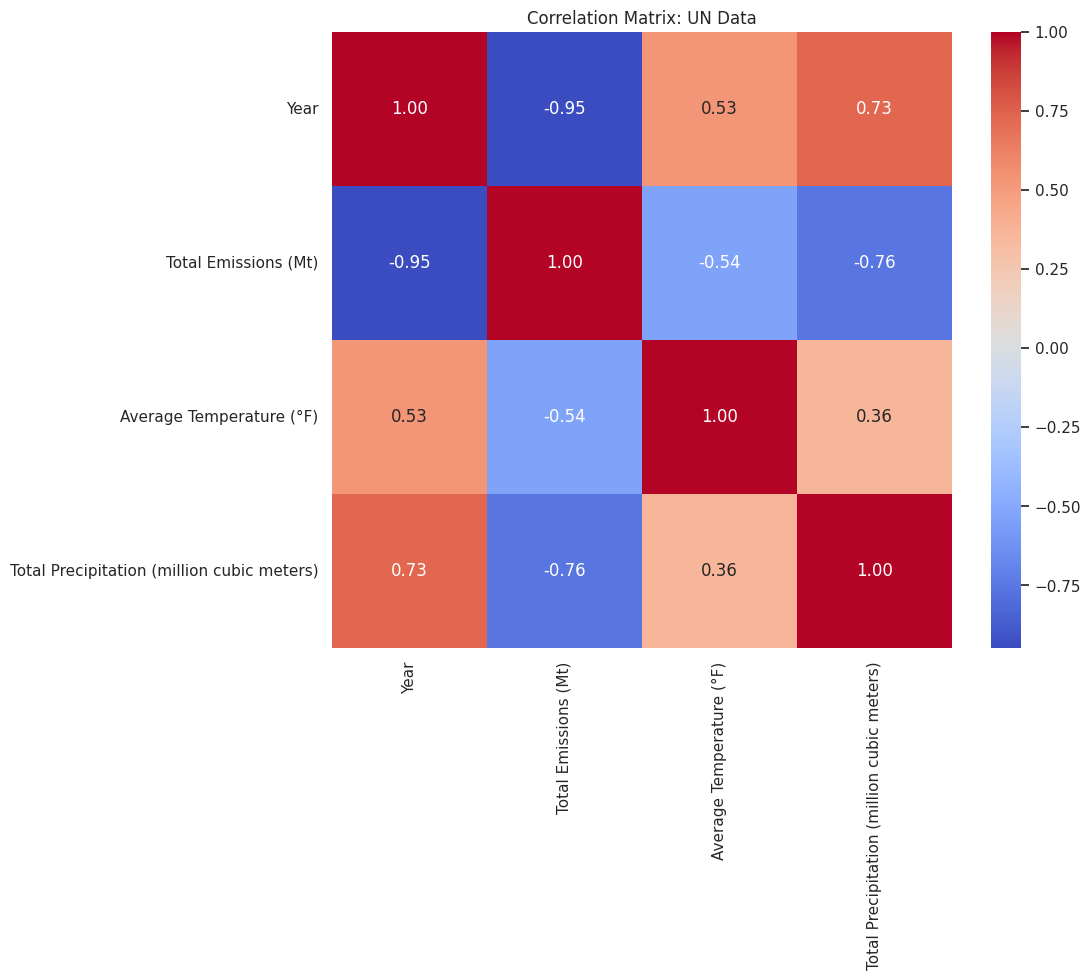

In [100]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: UN Data')
plt.show()